In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2

In [2]:
input_path = 'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification\\ten-crops-somas-vs-neurites'

In [3]:
img_list = os.listdir(input_path)

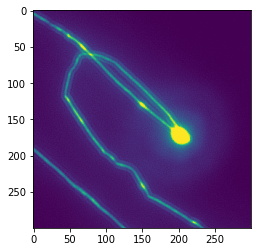

In [4]:
current_img_path = os.path.join(input_path, img_list[1])
current_img = cv2.imread(current_img_path, 0)
plt.imshow(current_img)

In [5]:
row, col = current_img.shape
print("the row and col are: ", row, col)

the row and col are:  300 300


In [6]:
centerRow, centerCol = int(row/2), int(col/2)
print("center row and col are: ", centerRow, centerCol)

center row and col are:  150 150


In [17]:
centerRectangle = 7

[[133.96536 146.54283 140.65453 ... 132.34305 140.65453 146.54283]
 [106.82669 145.22838 145.8522  ... 138.33304 141.69128 129.84607]
 [130.00716 148.75453 151.63934 ... 141.8854  130.99936 133.87488]
 ...
 [146.65092 152.69586 143.03894 ... 145.91992 144.78853 144.8734 ]
 [130.00714 133.87488 130.99936 ... 134.17567 151.63934 148.75453]
 [106.82667 129.84607 141.69128 ... 127.81333 145.8522  145.22838]]
143.54231


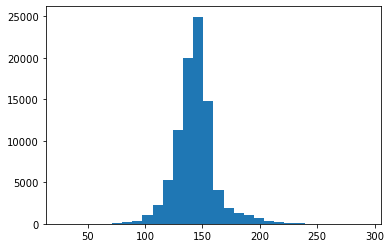

In [41]:
# imgAngle = np.angle(imgFFT2)
# print("img fft angle is: ", imgAngle)
dft = cv2.dft(np.float32(current_img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
imgMagnitude = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
print(imgMagnitude)
plt.hist(imgMagnitude.ravel(), bins=30)
print(np.median(imgMagnitude))

In [19]:
# Low pass filtering to get the soma
freqMask_LPF = np.zeros((row, col, 2), np.uint8)
freqMask_LPF[centerRow - centerRectangle: centerRow + centerRectangle,
            centerCol - centerRectangle: centerCol + centerRectangle] = 1
imgFFT_shift_LPF = dft_shift * freqMask_LPF
# print(imgFFT_shift_LPF)

20604.395


(array([1.6000e+01, 8.6000e+01, 4.4400e+02, 1.6980e+03, 5.0900e+03,
        1.2852e+04, 2.3628e+04, 2.6127e+04, 1.1718e+04, 3.1160e+03,
        1.6440e+03, 1.1120e+03, 8.8000e+02, 5.9000e+02, 3.8600e+02,
        2.3600e+02, 1.1800e+02, 1.0400e+02, 5.4000e+01, 5.0000e+01,
        2.0000e+01, 8.0000e+00, 6.0000e+00, 6.0000e+00, 6.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  731.99194,  3554.2231 ,  6376.4546 ,  9198.686  , 12020.917  ,
        14843.148  , 17665.379  , 20487.611  , 23309.842  , 26132.074  ,
        28954.305  , 31776.535  , 34598.766  , 37421.     , 40243.23   ,
        43065.46   , 45887.69   , 48709.92   , 51532.156  , 54354.387  ,
        57176.617  , 59998.848  , 62821.08   , 65643.31   , 68465.54   ,
        71287.77   , 74110.01   , 76932.234  , 79754.47   , 82576.695  ,
        85398.93   ], dtype=float32),
 <a list of 30 Patch objects>)

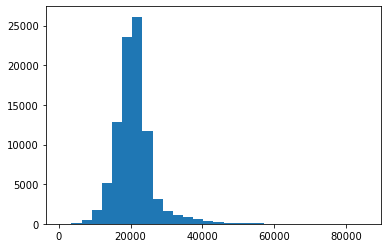

In [35]:
# power calculation
# imgFFT_shift_LPF_power = np.abs(imgFFT_shift_LPF)**2
# imgMagnitude_LPF = 20*np.log(cv2.magnitude(imgFFT_shift_LPF[:,:,0], imgFFT_shift_LPF[:,:,1]))
# plt.imshow(imgMagnitude_LPF)
power = imgMagnitude**2
median_pow = np.median(power)
print(median_pow)
plt.hist(power.ravel(), bins=30)

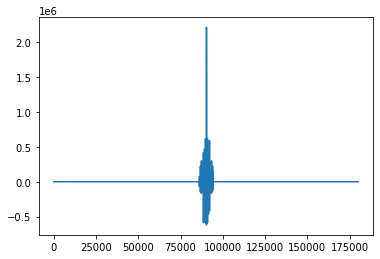

In [33]:
plt.plot(imgFFT_shift_LPF.ravel())

In [22]:
# Median freq after LPF
med_LPF = np.median(imgFFT_shift_LPF[:,:,1])
print(med_LPF)

0.0


[[1537809.  1664235.8 1788005.9 ... 1159418.2 1283770.2 1410432.5]
 [1596666.1 1731207.8 1863523.  ... 1196592.  1327730.4 1461618. ]
 [1649498.1 1791305.2 1931324.1 ... 1230186.5 1367325.5 1507619.5]
 ...
 [1330042.1 1427807.6 1521744.6 ... 1029463.7 1129317.  1230022.5]
 [1403949.4 1511899.8 1616385.1 ... 1075526.8 1184170.  1294167.6]
 [1473395.9 1590930.9 1705393.9 ... 1118957.6 1235790.8 1354466.8]]


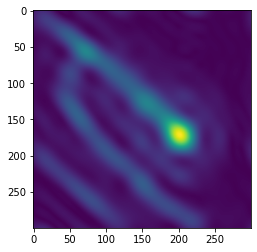

In [29]:
# Inverse Transfer to show the image
img_LPF_iFFT_shift = np.fft.ifftshift(imgFFT_shift_LPF)
img_back = cv2.idft(img_LPF_iFFT_shift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
# img_LPF_iFFT_mag = np.abs(img_LPF_iFFT)
print(img_back)
plt.imshow(img_back)

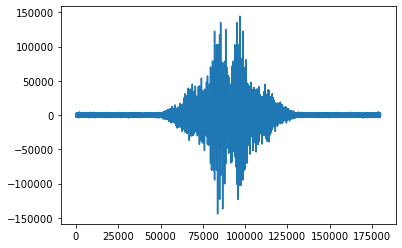

In [32]:
# high pass filtering
dft_shift[centerRow - centerRectangle: centerRow + centerRectangle,
            centerCol - centerRectangle: centerCol + centerRectangle] = 0
imgFFT_shift_HPF = dft_shift
plt.plot(imgFFT_shift_HPF.ravel())
dft_i_shift = np.fft.ifftshift(dft_shift)
# print(dft_i_shift)
# plt.imshow(np.abs(FFT2shift))

[[1080490.4  1403760.8  1281090.   ... 1159418.2  1283770.1  1320643.5 ]
 [1469365.1  1335809.5  1204496.1  ... 1196592.   1327730.   1461618.2 ]
 [4833744.5  1723824.2  1135593.2  ... 1230186.8  1367326.   1327927.1 ]
 ...
 [1330042.2  1427807.9  1521744.6  ...  671139.7   504347.62  605018.8 ]
 [1224636.1  1511899.5  1437043.8  ...  189117.31  825698.    491065.44]
 [1204296.6  1411482.6  1525925.   ...  760116.44  520043.38  727583.44]]


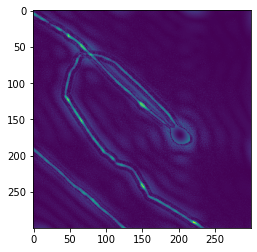

In [30]:
# Inverse Transfer to show the image
img_back = cv2.idft(dft_i_shift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
print(img_back)
plt.imshow(img_back)
#
# img_HPF_iFFT_shift = np.fft.ifftshift(imgFFT_shift_HPF)
# img_back = cv2.idft(img_HPF_iFFT_shift)
# img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
# img_LPF_iFFT_mag = np.abs(img_LPF_iFFT)
# print(img_back)
# plt.imshow(img_back)